In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as  np

df = pd.read_csv('processedDF.csv', header='infer')

/var/folders/yf/64msspd51930bljsmskng8v00000gn/T/ipykernel_80800/1794419873.py:6: DtypeWarning: Columns (455) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('processedDF.csv', header='infer')


In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import glob
import matplotlib.colors as mcolors
import seaborn as sns

## define colors used through the remaning part of the notebook
medimumvioletred = '#C71585'
seagreen = '#2E8B57'
mblue = mcolors.CSS4_COLORS['royalblue']
fpink = mcolors.CSS4_COLORS['mediumorchid']

<AxesSubplot:xlabel='SexGrp', ylabel='count'>

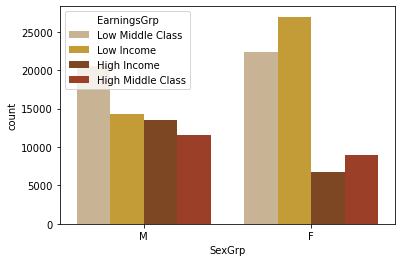

In [8]:
cafe_colors =  [
                (210,180,140),
                (218,165,32), 
                (139,69,19),
                (175, 51, 21), 
                (35, 36, 21), 
                (188,143,143)
               ]
cafe_colors = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in cafe_colors]

sns.countplot(x="SexGrp", hue="EarningsGrp", palette=sns.blend_palette(cafe_colors, n_colors=6), data=df)
plt.savefig('')

In [6]:
#Donut 1
## dataframe creation - for plotting
plotdfDP1 = df.groupby(["MetroGrp", "ChildNumGrp"], as_index=False)["TUCASEID"].count()
mdf = plotdfDP1[plotdfDP1['MetroGrp'] == "Metro"] \
                         .sort_values(by=['ChildNumGrp'])[['ChildNumGrp', 'TUCASEID']]

nmdf = plotdfDP1[plotdfDP1['MetroGrp'] == "NonMetro"] \
                            .sort_values(by=['ChildNumGrp'])[['ChildNumGrp', 'TUCASEID']]

# #get unique values from the just created pandas dataframes and store them in an array
labels_metro_children_population = mdf['ChildNumGrp']
labels_nonmetro_children_population = nmdf['ChildNumGrp']

# # get all the counts from the created pandas dataframes and store them in an array
values_metro_children_population = mdf['TUCASEID']
values_nonmetro_children_population = nmdf['TUCASEID']
print(nmdf)
## Creating two pie charts

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

# create an array of colors which will be custom colors to the plot
cafe_colors =  [
                'rgb(210,180,140)',
                'rgb(218,165,32)', 
                'rgb(139,69,19)',
                'rgb(175, 51, 21)', 
                'rgb(35, 36, 21)', 
                'rgb(188,143,143)'
               ]

# crate traces to specify the various properties of the first pie chart subplot
fig.add_trace(go.Pie(labels = labels_metro_children_population,
                     values = values_metro_children_population, 
                     name = "Metro Children Distribution", 
                     marker_colors = cafe_colors),
               1, 1)

# crate traces to specify the various properties of the second pie chart subplot
fig.add_trace(go.Pie(labels = labels_nonmetro_children_population, 
                     values = values_nonmetro_children_population, 
                     name="NonMetro Children Distribution", 
                     marker_colors = cafe_colors),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, 
                  hoverinfo="label+value+percent+name")

#adabt layout of the chart for reability
fig.update_layout(
    title_text="Children Population by Metro Status",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text = 'Metro', 
                         x = 0.19, 
                         y = 0.5, 
                         font_size = 17, 
                         showarrow = False),
                 
                 dict(text = 'Non Metro', 
                         x = 0.84, 
                         y = 0.5, 
                         font_size = 17, 
                         showarrow = False)])
fig.show()
fig.write_html("2d1.html")

    ChildNumGrp  TUCASEID
4  1-2 children     10754
5  3-4 children      2709
6   >5 children       246
7          None     19119


In [5]:
#Donut 2
## dataframe creation - for plotting
plotdfDP2 = df.groupby(["SexGrp", "EarningsGrp"], as_index=False)["TUCASEID"].count()
mdf = plotdfDP2[plotdfDP2['SexGrp'] == "M"] \
                         .sort_values(by=['EarningsGrp'])[['EarningsGrp', 'TUCASEID']]

fdf = plotdfDP2[plotdfDP2['SexGrp'] == "F"] \
                            .sort_values(by=['EarningsGrp'])[['EarningsGrp', 'TUCASEID']]

# #get unique values from the just created pandas dataframes and store them in an array
labels_male_earnings_population = mdf['EarningsGrp']
labels_female_earnings_population = fdf['EarningsGrp']

# # get all the counts from the created pandas dataframes and store them in an array
values_male_earnings_population = mdf['TUCASEID']
values_female_earnings_population = fdf['TUCASEID']
print(fdf)
## Creating two pie charts

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

# create an array of colors which will be custom colors to the plot
cafe_colors =  [
                'rgb(210,180,140)',
                'rgb(218,165,32)', 
                'rgb(139,69,19)',
                'rgb(175, 51, 21)', 
                'rgb(35, 36, 21)', 
                'rgb(188,143,143)'
               ]

# crate traces to specify the various properties of the first pie chart subplot
fig.add_trace(go.Pie(labels = labels_male_earnings_population,
                     values = values_male_earnings_population, 
                     name = "Male Earnings Distribution", 
                     marker_colors = cafe_colors),
               1, 1)

# crate traces to specify the various properties of the second pie chart subplot
fig.add_trace(go.Pie(labels = labels_female_earnings_population, 
                     values = values_female_earnings_population, 
                     name="Female Earnings Distribution", 
                     marker_colors = cafe_colors),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, 
                  hoverinfo="value+percent+name")

#adabt layout of the chart for reability
fig.update_layout(
    title_text="Earning Groups by Sex",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text = 'Male', 
                         x = 0.20, 
                         y = 0.5, 
                         font_size = 17, 
                         showarrow = False),
                 
                 dict(text = 'Female', 
                         x = 0.82, 
                         y = 0.5, 
                         font_size = 17, 
                         showarrow = False)])
fig.show()
fig.write_html("2d1.html")

         EarningsGrp  TUCASEID
0        High Income      6736
1  High Middle Class      8907
2         Low Income     26958
3   Low Middle Class     22386
